This Notebook Forward Propagates Seismic Images through VGG19 CNN and Compares Features Maps that are Most and Least Similar

In [1]:
# %% load VGG model and dependencies
%load_ext autoreload
%autoreload 2

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras.backend import clear_session

import matplotlib.pyplot as plt
from numpy import expand_dims


In [2]:
# Import helper functions from utils folder
from src.definitions import ROOT_DIR
from src.data.utils import plot_image_compare, gen_feature_map, L2_norm, Filter_Activation_Sort


In [3]:
Model()

In [4]:
#Model weights and structure as VGG19 (may take a while to download)
model = VGG19()
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Plot Seismic Images before Passing into Feature Mapping Scheme

In [5]:
# Path for seismic images
impath1 = ROOT_DIR / 'src/data/F3_Crop1.jpg'
impath2 = ROOT_DIR / 'src/data/F3_Crop2.jpg'
assert impath1.exists()

In [6]:
#Convert seismic images to arrays
img1 = img_to_array(load_img(impath1))/255
img2 = img_to_array(load_img(impath2))/255

Text(0.5, 0.98, 'Seismic Image Comparison')

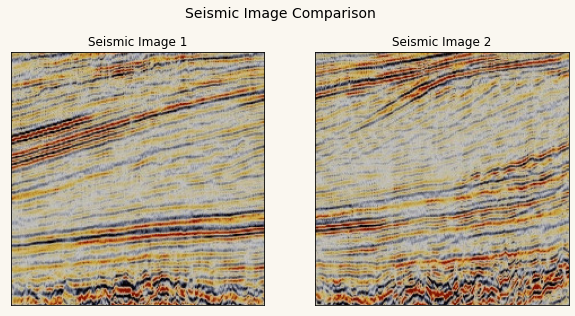

In [7]:
# View seismic images
fig, ax = plt.subplots(1, 2, figsize=(10,5), facecolor=(0.98,0.97,0.94,1))
ax = plt.subplot(1, 2, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.title.set_text('Seismic Image 1')
plt.imshow(img1)
ax = plt.subplot(1, 2, 2)
ax.set_xticks([])
ax.set_yticks([])
ax.title.set_text('Seismic Image 2')
plt.imshow(img2)
fig.suptitle('Seismic Image Comparison', fontsize=14)

Looking at the two seimic images below, an experienced interpreter would pretty quickly home in on key features like angular truncations, offset reflectors, bright spots, and noise zones for example.

Generate Feature Maps at Shallow Layer in the VGG19 Network

In [8]:
# Feature Maps at VGG19 Layer 2
layer_out = 2
model = Model(inputs=model.inputs, outputs=model.layers[layer_out].output)

feature_map1 = gen_feature_map(model, layer_out, impath1)

feature_map2 = gen_feature_map(model, layer_out, impath2)

#Caculate the similarity between feature maps using euclidean distance
cutoff_minimum_activation=10 #don't display feature maps of low activation

filters_similar, filters_different = Filter_Activation_Sort(feature_map1, feature_map2, cutoff_minimum_activation)

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


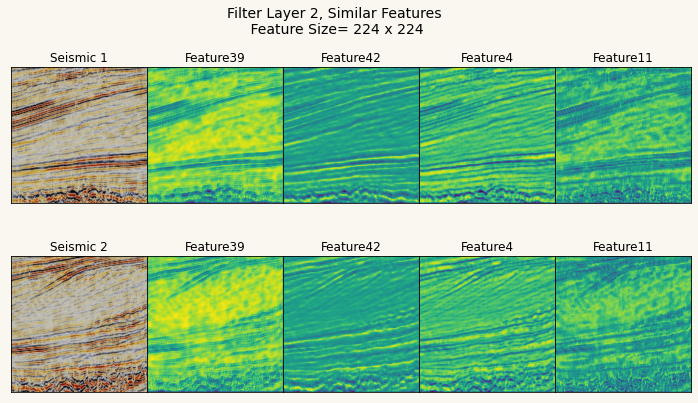

In [10]:
#Plot Similar Feature Maps
chart_title = f'Filter Layer {layer_out}, Similar Features'
plot_image_compare(feature_map1, feature_map2, img1, img2, filters_similar, chart_title)

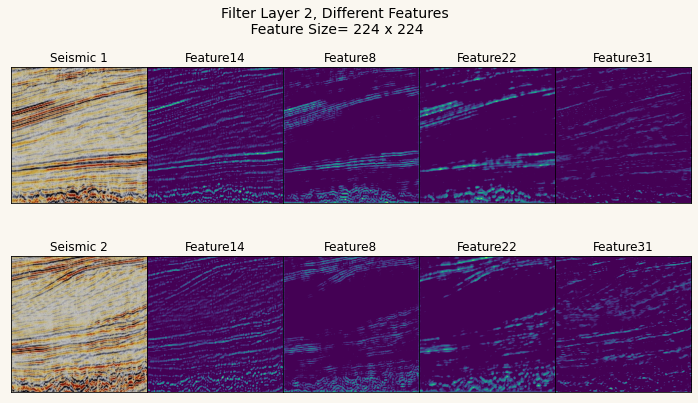

In [11]:
#Plot Different Feature Maps
chart_title = f'Filter Layer {layer_out}, Different Features'
plot_image_compare(feature_map1, feature_map2, img1, img2, filters_different, chart_title)

Consider how Seismic Image 1 and Seismic Image 2 above may be interpreted through the eyes of a deep neural network in the figures above. Of the 64 features extracted shallow in the network, the two images share both similar and different activations, quantifying the comparision between them.

Generate Feature Maps at Middle Layer in the VGG19 Network

In [12]:
clear_session()
model = VGG19()

In [13]:
# Feature Maps at VGG19 Layer 2
layer_out = 13
model = Model(inputs=model.inputs, outputs=model.layers[layer_out].output)

feature_map1 = gen_feature_map(model, layer_out, impath1)

feature_map2 = gen_feature_map(model, layer_out, impath2)

#Caculate the similarity between feature maps using euclidean distance
cutoff_minimum_activation=35 #don't display feature maps of low activation

filters_similar, filters_different = Filter_Activation_Sort(feature_map1, feature_map2, cutoff_minimum_activation)

In [14]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

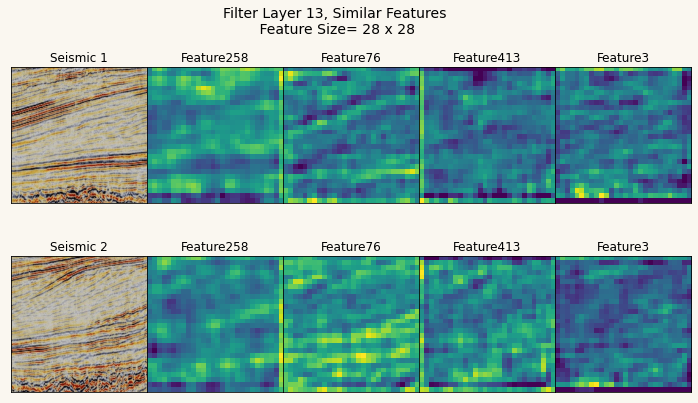

In [15]:
#Plot Similar Feature Maps
chart_title = f'Filter Layer {layer_out}, Similar Features'
plot_image_compare(feature_map1, feature_map2, img1, img2, filters_similar, chart_title)

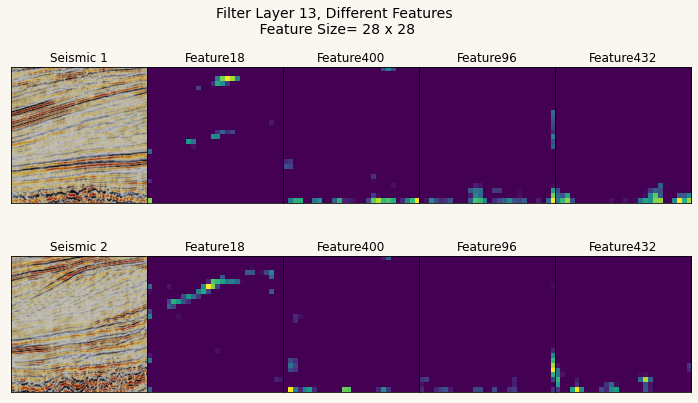

In [16]:
#Plot Different Feature Maps
chart_title = f'Filter Layer {layer_out}, Different Features'
plot_image_compare(feature_map1, feature_map2, img1, img2, filters_different, chart_title)

Generate Feature Maps at Deep Layer in the VGG19 Networkb

In [17]:
clear_session()
model = VGG19()

In [18]:
# Feature Maps at VGG19 Layer 2
layer_out = 19
model = Model(inputs=model.inputs, outputs=model.layers[layer_out].output)

feature_map1 = gen_feature_map(model, layer_out, impath1)

feature_map2 = gen_feature_map(model, layer_out, impath2)

#Caculate the similarity between feature maps using euclidean distance
cutoff_minimum_activation=35 #don't display feature maps of low activation

filters_similar, filters_different = Filter_Activation_Sort(feature_map1, feature_map2, cutoff_minimum_activation)

In [19]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

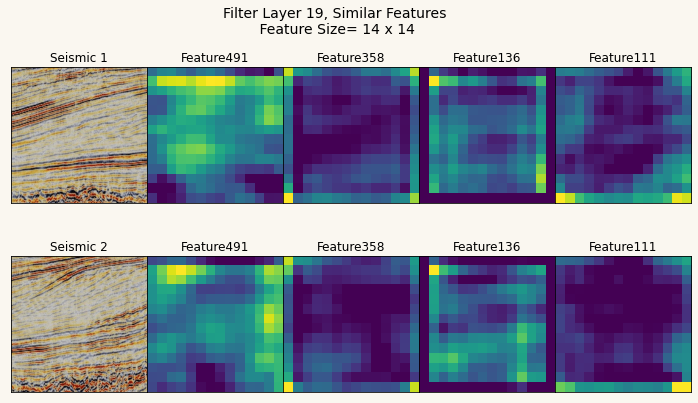

In [20]:
#Plot Similar Feature Maps
chart_title = f'Filter Layer {layer_out}, Similar Features'
plot_image_compare(feature_map1, feature_map2, img1, img2, filters_similar, chart_title)

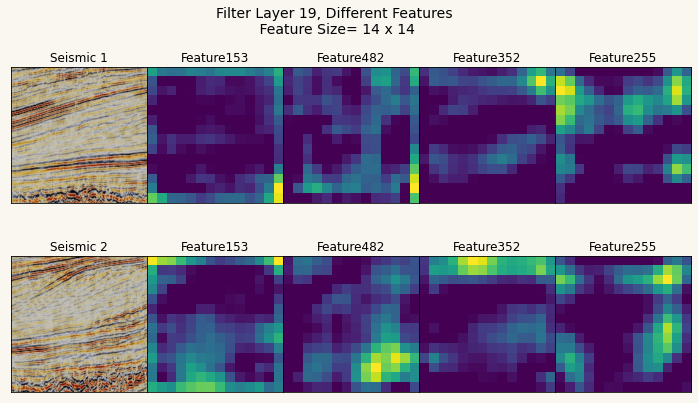

In [21]:
#Plot Different Feature Maps
chart_title = f'Filter Layer {layer_out}, Different Features'
plot_image_compare(feature_map1, feature_map2, img1, img2, filters_different, chart_title)

While even a novice interpreter would be able to compare and contrast the two seismic images, the neural network has quantitatively encoded more features at all scales, further setting the stage for statistical analysis and input into machine learning algorithms. While an interpreter is always needed to determine what an image means, the neural network provides additional, less biased tools to identify key features, quantify seismic characteristics, and ultimately de-risk prospect inventories and help safely plan and drill wells. 